## TOC:
* [Introduct Assignment](#1.1)
* [Second Bullet Header](#1.2)

In [73]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\william\anaconda3\lib\site-packages (from imbalanced-learn) (2.2.0)



In [74]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install vecstack

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


## 2.1 Import necessary library

In [79]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics
 
"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn import tree

"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score\



"""Ensembling"""
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

In [80]:
"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

<a id="1.1"></a> 
## <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

***

## <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>Hypothisis </strong></h1>
***

- High Weight likely get more positive stepsis
- High Age likely get positive stepsis


<h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong> Data Preparation & Data exploration (EDA) </strong></h1>

***

## 2.2 Import data

### Import Train dataset

In [82]:
train = pd.read_csv("Paitients_Files_Train.csv")
train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out

In [83]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


### Import Test dataset

In [85]:
test = pd.read_csv("Paitients_Files_Test.csv")
test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces ou

In [86]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


## Transform to UPERCASE

In [87]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
train = train.applymap(lambda s: s.upper() if type(s) == str else s)
train.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,POSITIVE
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,NEGATIVE
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,POSITIVE


In [88]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
test = test.applymap(lambda s: s.upper() if type(s) == str else s)
test.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


## Rename Column Sepssis to Sepsis

In [89]:
#rename
train.rename(columns={"Sepssis": "Sepsis"}, inplace=True)
test.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

## Change Sepsis to 0 (negative) and 1 (positive)

In [90]:
import numpy
train.loc[train['Sepsis'].isin(['POSITIVE']), 'Sepsis'] = '1'
train.loc[train['Sepsis'].isin(['NEGATIVE']), 'Sepsis'] = '0'
train['Sepsis'] = train['Sepsis'].astype('int')

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    int32  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 49.3+ KB


## M11

In [92]:
train_M11_q_low = train["M11"].quantile(0.01)
train_M11_q_hi  = train["M11"].quantile(0.99)

df_filtered = train[(train["M11"] > train_M11_q_hi) | (train["M11"] < train_M11_q_low) | (train["M11"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

2.337228714524207


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,1
49,ICU200059,7,105,0,0,0,0.0,0.305,24,0,0
60,ICU200070,2,84,0,0,0,0.0,0.304,21,0,0
81,ICU200091,2,74,0,0,0,0.0,0.102,22,1,0
120,ICU200130,0,162,76,56,100,53.2,0.759,25,1,1
125,ICU200135,1,88,30,42,99,55.0,0.496,26,1,1
145,ICU200155,0,102,75,23,0,0.0,0.572,21,1,0
177,ICU200187,0,129,110,46,130,67.1,0.319,26,1,1
303,ICU200313,5,115,98,0,0,52.9,0.209,28,1,1
371,ICU200381,0,118,64,23,89,0.0,1.731,21,1,0


## Sample test Dataset

In [93]:
test_M11_q_low = test["M11"].quantile(0.01)
test_M11_q_hi  = test["M11"].quantile(0.99)

df_filtered = test[(test["M11"] > test_M11_q_hi) | (test["M11"] < test_M11_q_low) | (test["M11"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

2.366863905325444


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
74,ICU200683,3,123,100,35,240,57.3,0.880,22,0
82,ICU200691,0,162,76,36,0,49.6,0.364,26,1
85,ICU200694,5,136,82,0,0,0.0,0.640,69,1
107,ICU200716,10,115,0,0,0,0.0,0.261,30,1



<h2 style="color:green;font-family:Georgia;text-align:left;"><strong> Extra exploration and visualization </strong></h2>

***

### 3.1 Histogram of each column

<Figure size 720x540 with 0 Axes>

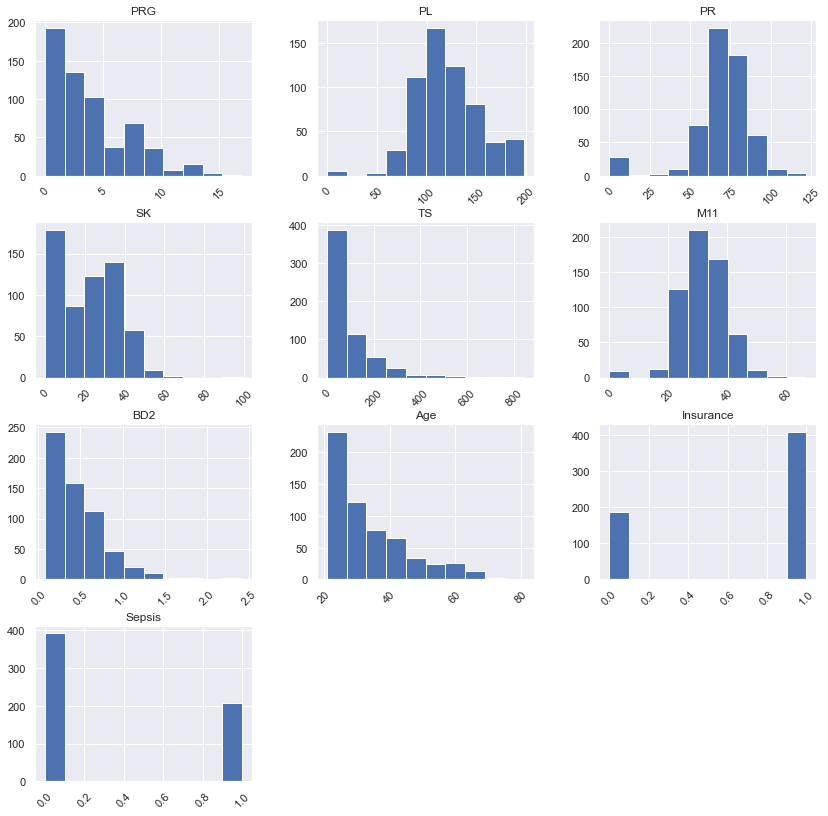

In [94]:
plt.figure()
train.hist(figsize=(14,14), xrot=45)
plt.show()

### ❓<span style="color:blue"> Comment: </span>
PRG ,SK ,TS ,BD2 have the same distribute
PL , PR ,M11 have the same distribution

### 3.2 Statistic of dataset

In [95]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


### ❓<span style="color:blue">  Comment: </span>
<li>This train data set has 601 raw and 9 columns.</li>
<li>only 34% patient got positive.</li>


### <span style="color:red"> Outliers detection</span>

In [96]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(train)
whitespace_remover(test)

In [97]:
"""#1.Create a function that removes outliers"""
def removeOutliers(variable):
    """Calculates and removes outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered


"""#2.Create another function to plot boxplot with and without outliers."""
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # This trace plots boxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    # This trace plots boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

In [98]:
"""Plot Age with and without outliers."""
plotBoxPlot(train.Age,removeOutliers(train.Age))

# Age remove outlines

In [99]:
"""Plot Weight with and without outliers."""
plotBoxPlot(train.M11,removeOutliers(train.M11))


## Bivariate Analysis

In [100]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = train.iloc[:599, :]
df_test = train.iloc[599:, :]

"""#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation."""
def boxplotAndCorrelation(numVariable,catVariable=df_train.Sepsis):
    """Return boxplot between a categorical and numerical variable. Also calculates biserial correlation.
    numVariable = a numerical variable of interest."""
    # Calculate point biserial correlation and p value
    biserialCorr = stats.pointbiserialr(numVariable,catVariable)[0].round(2)
    pValue = stats.pointbiserialr(numVariable,catVariable)[1].round(5)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots boxplot of categorical variable vs numerical variable
    fig.add_trace(
        go.Box(
            x = catVariable,
            y = numVariable,
            marker_color="lightseagreen",
            ))
    
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Association between {catVariable.name} and {numVariable.name} (corr: {biserialCorr}, p: {pValue})",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>{numVariable.name}</b>")
    return fig.show()


"""#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean."""
def numGroupedByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns a barplot showing mean of numerical variable across the class of categorical variable."""
    
    # Calculates mean across different classes of categorical variable
    numGroupedByCat = numVariable.groupby(catVariable).mean().round(2)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots barplot
    fig.add_trace(
        go.Bar(
            x = numGroupedByCat.index,
            y = numGroupedByCat,
            text=numGroupedByCat,
            hoverinfo="x+y",
            textposition="auto",
            textfont=dict(family="sans serif",size=15)
        ))
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Mean {numVariable.name} across {catVariable.name}",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>Mean {numVariable.name}</b>")
    return fig.show()

    
"""#3.This function plots histogram of numerical variable for every class of categorical variable."""
def numHistByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns numerical variable distribution across classes of categorical variable."""
    fig,ax = plt.subplots(1,1,figsize = (18,7))
    font_size = 15
    title_size = 18
    numVariable[catVariable==1].hist(bins=50,color="green", label = "survived", grid = False, alpha=0.5)
    numVariable[catVariable==0].hist(bins=50,color="red", label = "died", grid = False, alpha=0.5)
    ax.set_yticks([])
    ax.tick_params(axis="x", labelsize=font_size)
    ax.set_xlabel(f"{numVariable.name}", fontsize = font_size)
    ax.set_title(f"{numVariable.name} Distribution of Survivors vs Victims", fontsize = title_size)
    plt.legend()
    return plt.show()

   
"""#4.Create a function to calculate anova between numerical and categorical variable."""
def calculateAnova(numVariable, catVariable=df_train.Sepsis):
    """Returns f statistics and p value after anova calculation."""
    
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    groupNumVariableByCatVariable0 = numVariable[catVariable==0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    # Calculate one way anova
    fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) # Calculate f statistics and p value
    return f"Anova Result between {numVariable.name} & {catVariable.name}: f=> {fValue}, p=> {pValue}"

In [101]:
"""Create a boxplot to visualize the strength of association of Sepsis with Age. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.Age)

In [102]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.Age)

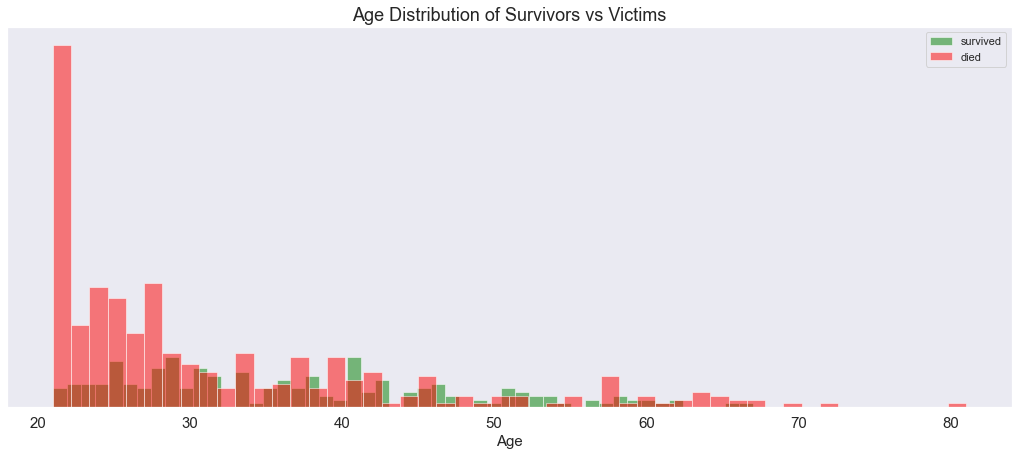

In [103]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.Age)

In [104]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.Age)

'Anova Result between Age & Sepsis: f=> 27.606648820443404, p=> 2.07187788918825e-07'

In [105]:
"""Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.M11)

In [106]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.M11)

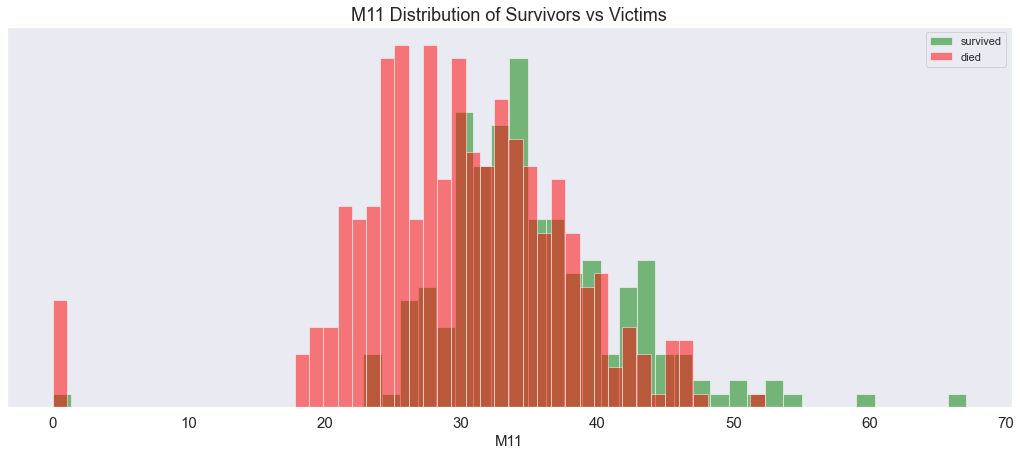

In [107]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.M11)

In [108]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.M11)

'Anova Result between M11 & Sepsis: f=> 66.1777664049268, p=> 2.3972519626647427e-15'

# <span style="color:red"> 5. EDA </span>
***
Before we dive into finding relations between independent variables and our dependent variable(Sepsis), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- PRG: High will get sepsis
- M11  : Obese will likely get sepsis
- AGE : old is likely get sepsis than young


## Percent of people having sepsis

<Figure size 1440x576 with 0 Axes>

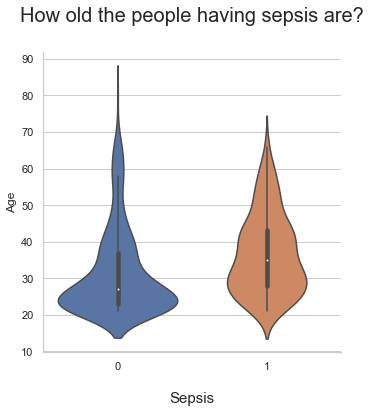

In [109]:
fig = plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='Age',
            kind="violin", data=train)
plt.title('How old the people having sepsis are?', fontsize = 20, pad = 30)
plt.ylabel("Age")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);



## ❓<span style="color:blue">  Comment: </span>
Observe from the plot , patients get sepsis mostly more than 30
***

## ❓<span style="color:blue"> Comment: </span>
Begin from 31 the positive tends to dominance negative which means people > 30 get sepsis more than young people
***

## Weight vs Sepsis

<Figure size 2880x2160 with 0 Axes>

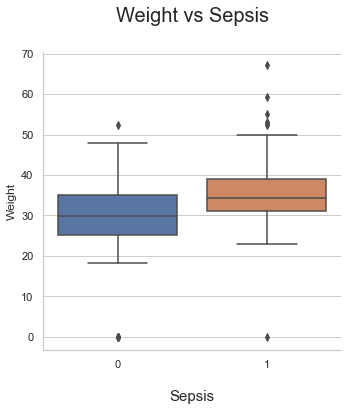

In [110]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='M11',
            kind="box", data=train)
plt.title('Weight vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("Weight")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

## ❓<span style="color:blue"> Comment: </span>
People are obese likely get sepsis
***

<Figure size 2880x2160 with 0 Axes>

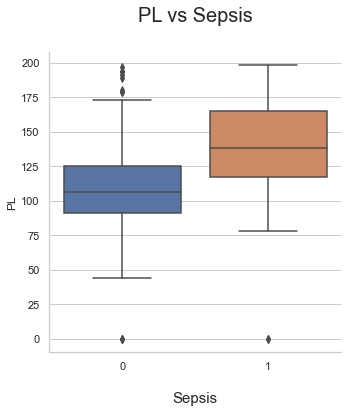

In [111]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='PL',
            kind="box", data=train)
plt.title('PL vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("PL")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

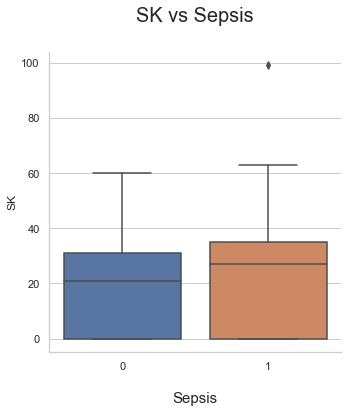

In [112]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='SK',
            kind="box", data=train)
plt.title('SK vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("SK")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

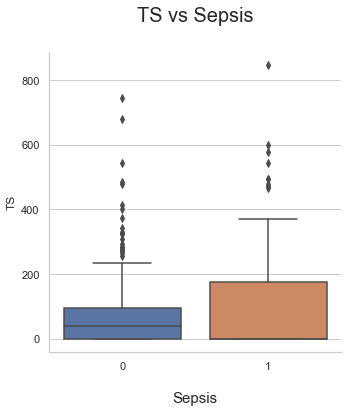

In [113]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='TS',
            kind="box", data=train)
plt.title('TS vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("TS")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

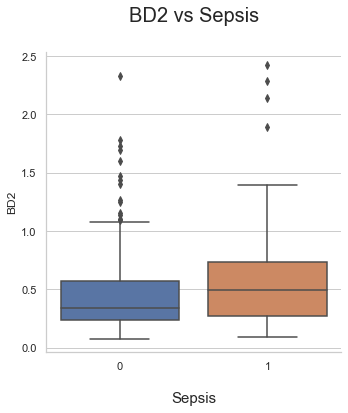

In [114]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='BD2',
            kind="box", data=train)
plt.title('BD2 vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("BD2")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

In [115]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

<AxesSubplot:>

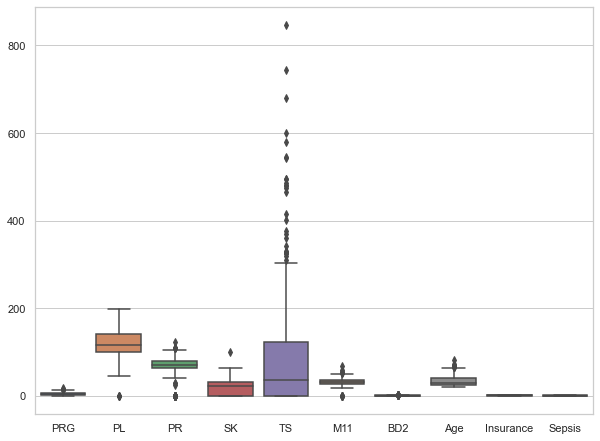

In [116]:
plt.rcParams['figure.figsize'] = [10,7.5]
sns.boxplot(data=train, orient="v")


# <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>  Feature Engineering </strong></h1>
***

## Remove PR with 0 value

In [117]:
test.loc[(test["PR"] == 0), 'PR'] = test["PR"].mean()
train.loc[(train["PR"] == 0), 'PR'] = train["PR"].mean()

## Remove M11 with 0 value

In [118]:
test.loc[(test["M11"] == 0), 'PR'] = test["M11"].mean()
train.loc[(train["M11"] == 0), 'PR'] = train["M11"].mean()

In [119]:
# Outlier detection 
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","M11","BD2"])

In [120]:
train.loc[Outliers_to_drop] # Show the outliers rows

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis


# No outliner

## Input missing value

 ###  ❓Comment: 
- There is no missing value
***

#  3. Check corelation for dropping
***

In [121]:
corelation = train.corr()

C:\Users\William\AppData\Local\Temp/ipykernel_1116/4104708637.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



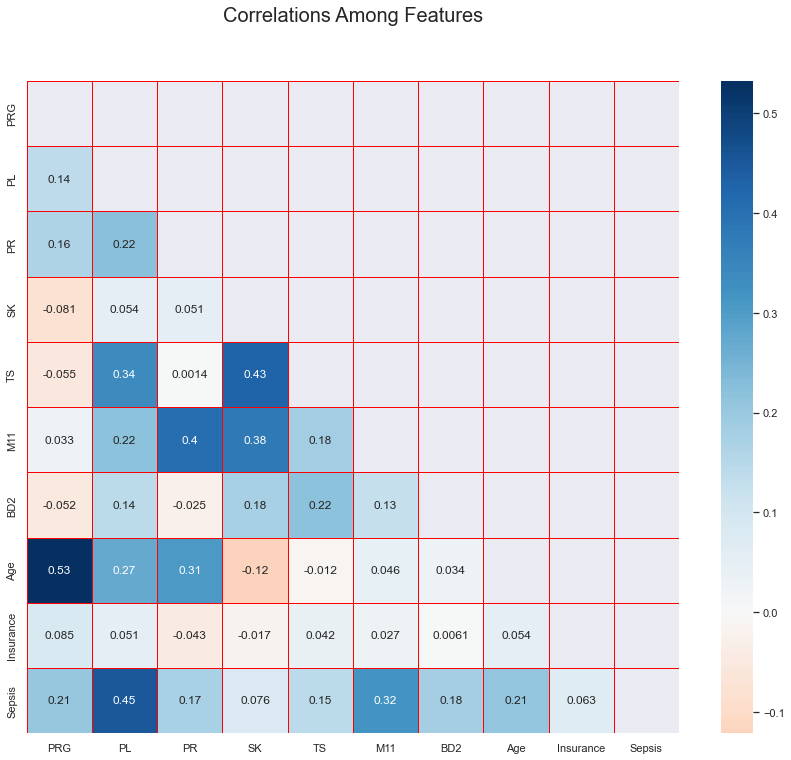

In [122]:
import matplotlib.style as style
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('darkgrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='red',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## ❓ <span style="color:blue "> Comment : </span>
 All corelation is under 50% so all data is fine
 
#### Positive Correlation Features:
- PL and Sepsis: 

#### Negative Correlation Features:
- No negative features



In [123]:


print (train.info())
print ("*"*40)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    float64
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    int32  
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 49.3+ KB
None
****************************************


<li>We may dont have missing values in our features.</Li>

## M11 filter Groupby

In [124]:
# Filter m11 using groupby
train.loc[(train["M11"] == 0), 'M11'] = np.nan
train['M11'] = train.groupby('Age')['M11'].apply(lambda x: x.fillna(x.median()))

## SK

In [125]:
# Filter SK using groupby
train.loc[(train["SK"] >90), 'SK'] = np.nan
train['SK'] = train.groupby('Age')['SK'].apply(lambda x: x.fillna(x.median()))

### PL

In [126]:
# Filter pl using groupby
train.loc[(train["PL"] == 0), 'PL'] = np.nan
train['PL'] = train.groupby('Age')['PL'].apply(lambda x: x.fillna(x.median()))

##  TS

In [127]:
# Filter SK using groupby
train.loc[(train["TS"] >650), 'TS'] = np.nan
train['TS'] = train.groupby('Age')['TS'].apply(lambda x: x.fillna(x.median()))


## Train - Test - Validation

## 2.3 Drop column ID and Insurance

In [128]:
train = train.drop(columns=['ID','Insurance'])
test = test.drop(columns=['ID','Insurance'])

In [129]:
train = train.drop(columns=['PRG'])
test = test.drop(columns=['PRG'])

### Splitting dataset into X and Y

In [130]:
X = train.drop(['Sepsis'], axis = 1)
y = train["Sepsis"]

## Check data 

In [131]:
X.head()

,PL,PR,SK,TS,M11,BD2,Age
0,148.0,72.0,35.0,0.0,33.6,0.627,50
1,85.0,66.0,29.0,0.0,26.6,0.351,31
2,183.0,64.0,0.0,0.0,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33


In [132]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Sepsis, dtype: int32

## Data transformation

In [133]:
display(X.dtypes)

PL     float64
PR     float64
SK     float64
TS     float64
M11    float64
BD2    float64
Age      int64
dtype: object

In [134]:
X.head()

,PL,PR,SK,TS,M11,BD2,Age
0,148.0,72.0,35.0,0.0,33.6,0.627,50
1,85.0,66.0,29.0,0.0,26.6,0.351,31
2,183.0,64.0,0.0,0.0,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33


In [135]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Sepsis, dtype: int32

 <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>Model Traning </strong></h1>
 

In [136]:
from sklearn.model_selection import train_test_split
seed = 42
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.7 , test_size = 0.3 , random_state=42)


In [137]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [138]:
print(X_test)

        PL    PR    SK     TS   M11    BD2  Age
110  171.0  72.0  33.0  135.0  33.3  0.199   24
419  129.0  64.0  29.0  115.0  26.4  0.219   28
564   91.0  80.0   0.0    0.0  32.4  0.601   27
77    95.0  72.0  33.0    0.0  37.7  0.370   27
181  119.0  64.0  18.0   92.0  34.9  0.725   23
..     ...   ...   ...    ...   ...    ...  ...
54   150.0  66.0  42.0  342.0  34.7  0.718   42
493  125.0  70.0  18.0  122.0  28.9  1.144   45
46   146.0  56.0   0.0    0.0  29.7  0.564   29
93   134.0  72.0   0.0    0.0  23.8  0.277   60
264  123.0  62.0   0.0    0.0  32.0  0.226   35

[180 rows x 7 columns]


In [139]:
from sklearn.preprocessing import RobustScaler
st_scale = StandardScaler()

X_train = st_scale.fit_transform(X_train)
X_test = st_scale.fit_transform(X_test)

test = st_scale.fit_transform(test)

In [140]:
"""See the dimensions of input and output data set."""
print(f"Input Matrix Dimension: {X_train.shape}")
print(f"Output Vector Dimension: {y_train.shape}")
print(f"Test Data Dimension: {X_test.shape}")

Input Matrix Dimension: (554, 7)
Output Vector Dimension: (554,)
Test Data Dimension: (180, 7)


In [141]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [142]:
"""Building machine learning models: 
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

"""Now initialize all the classifiers object."""
"""#1.Logistic Regression"""
lr = LogisticRegression()

"""#3.Random Forest Classifier"""
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)




# Decision Tree
***

In [143]:
"""#6.Decision Tree Classifier"""
dt = DecisionTreeClassifier(random_state = seed)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6722222222222223

## Hypertunning 

In [145]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""

'For DT, the following hyperparameters are usually tunned.'

In [146]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       114
           1       0.55      0.64      0.59        66

    accuracy                           0.67       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.69      0.67      0.68       180



In [148]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00160449 0.00160449 0.00162455 0.00162455 0.00164096
 0.00165463 0.0016662  0.00168472 0.00170477 0.00175627 0.00179028
 0.00196339 0.00203647 0.00216606 0.00240013 0.00240674 0.00240674
 0.00240674 0.00240674 0.00288809 0.00294826 0.00307126 0.00309438
 0.00311616 0.00315884 0.00320899 0.00327086 0.00369889 0.00370268
 0.00390021 0.00425919 0.0043271  0.00434685 0.00448024 0.00485359
 0.00491376 0.0051573  0.00520028 0.00524831 0.00549392 0.00597905
 0.00609206 0.0064888  0.00706359 0.00817048 0.00925871 0.01154843
 0.01563566 0.0200141  0.06949405 0.10835385]


In [149]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

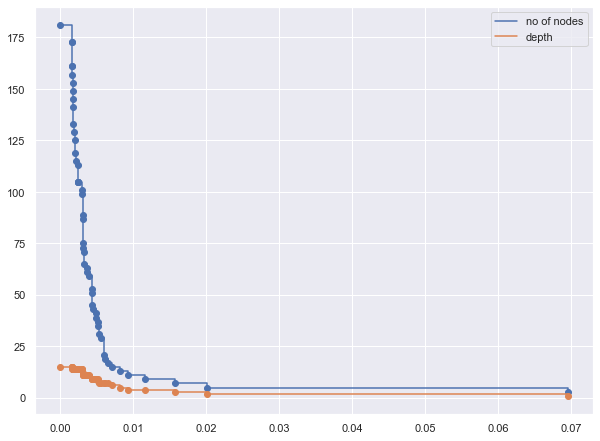

In [150]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

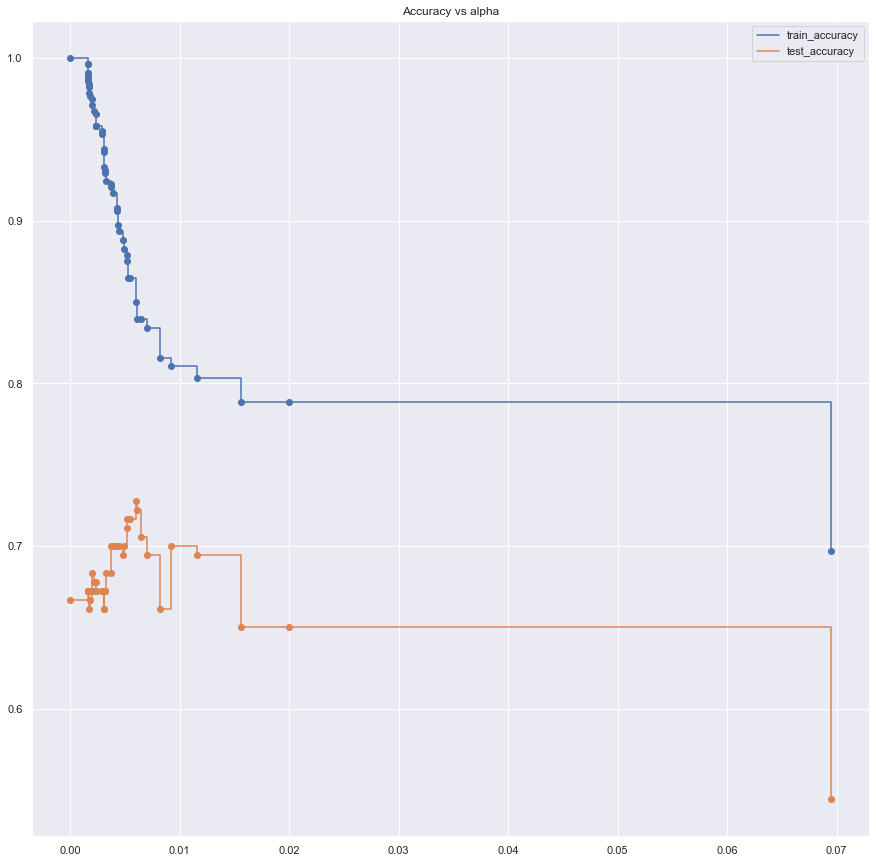

In [151]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
plt.figure(figsize=(15,15))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.7888086642599278
Test score 0.65
Train Confusion matrix


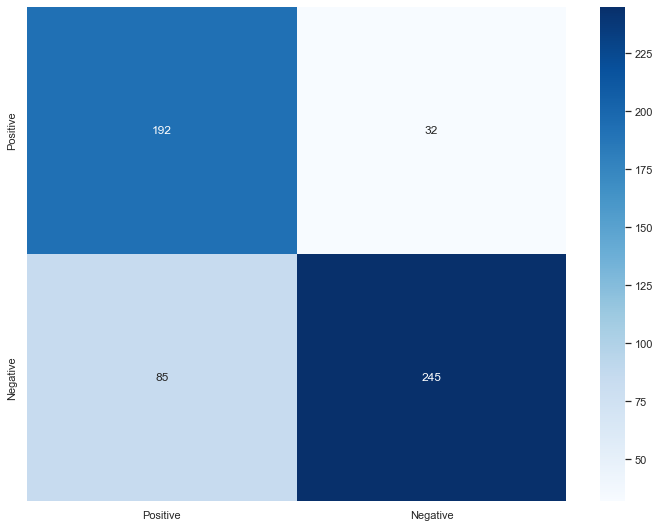

Test Confusion matrix


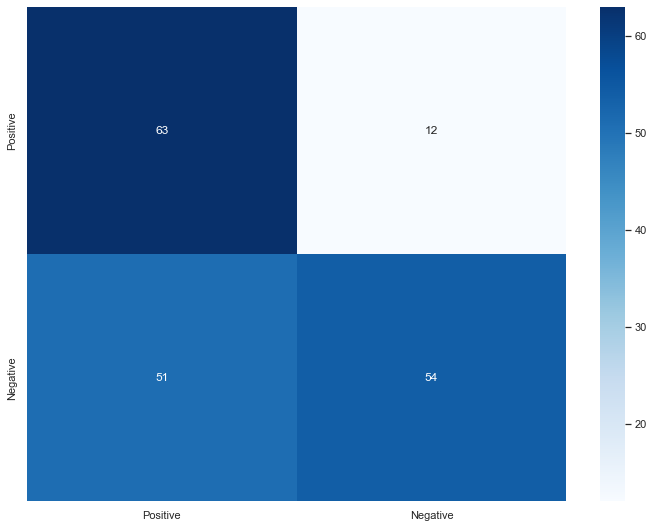

In [152]:
clf_ = DecisionTreeClassifier(random_state=42,ccp_alpha=0.03)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# Gridsearch

In [153]:
dtparams = {'max_depth': [2,4,6,8,10,20,None],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [5, 10, 20, 50, 100],
           'criterion': ["gini", "entropy"]}
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)
gcv = GridSearchCV(estimator=dt,param_grid=dtparams,cv=cv, n_jobs=-1, verbose=1, scoring = "roc_auc")
gcv.fit(X_train,y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 20, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 4]},
             scoring='roc_auc', verbose=1)

In [154]:
## Getting the best of everything. 
print (gcv.best_score_)
print (gcv.best_params_)
print(gcv.best_estimator_)

0.8510041407867494
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       random_state=42)


The Training f1 Accuracy for max_depth 1.0 is: 0.7738317757009345
The Test f1 Accuracy for max_depth 1.0 is: 0.6308724832214765
The Training f1 Accuracy for max_depth 1.0 is: 0.7738317757009345
The Test f1 Accuracy for max_depth 1.0 is: 0.6308724832214765


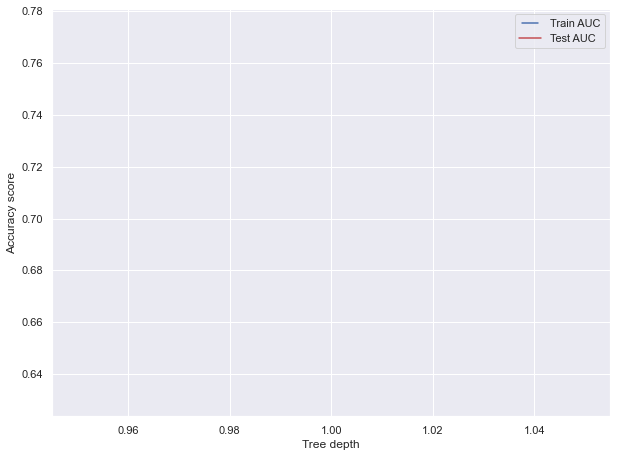

In [155]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 1, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   decisionTree =DecisionTreeClassifier(criterion = 'gini',
                                              max_depth = 6,
                                              max_features='auto',
                                              ccp_alpha = 0.02, 
                                              min_samples_leaf=20, 
                                              min_samples_split=2,
                                               random_state=42,
                                                splitter = "best")
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

In [156]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

Train F1 score: 0.7738317757009345
Test F1 score: 0.6308724832214765


Train score 0.7815884476534296
Test score 0.6944444444444444
Train Confusion matrix


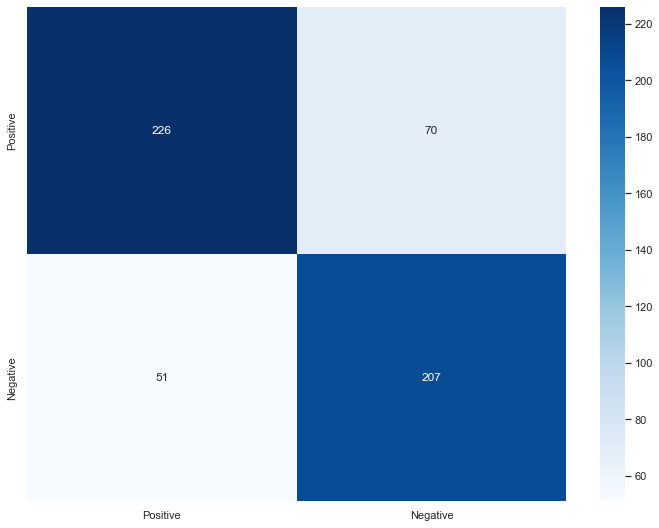

Test Confusion matrix


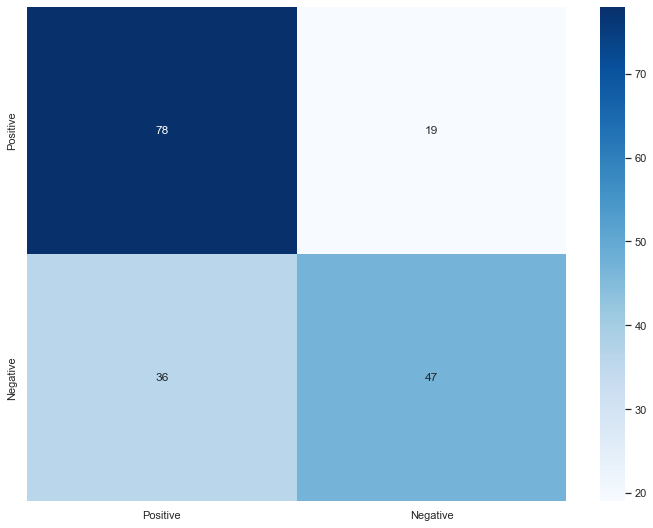

In [157]:
print(f'Train score {accuracy_score(train_pred,y_train)}')
print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

In [158]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       277
           1       0.80      0.75      0.77       277

    accuracy                           0.78       554
   macro avg       0.78      0.78      0.78       554
weighted avg       0.78      0.78      0.78       554



In [159]:
print(y_train)

0      0
1      0
2      1
3      0
4      0
      ..
549    1
550    1
551    1
552    1
553    1
Name: Sepsis, Length: 554, dtype: int32


In [160]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="roc_auc", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

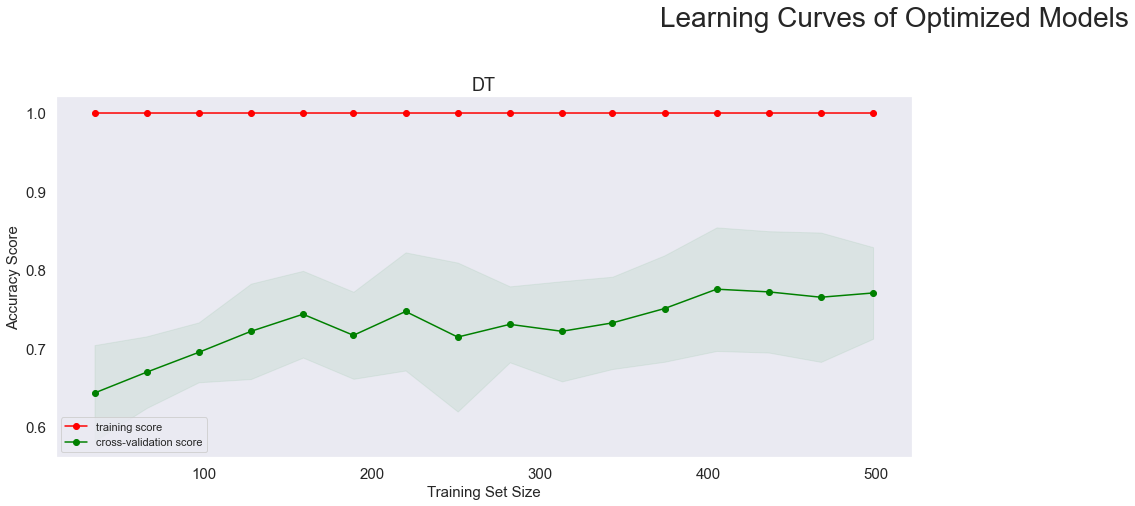

In [161]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [dt]
lcLabels = ["DT"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# Logistic Regression
***

In [162]:
"""#6.Decision Tree Classifier"""
lr = LogisticRegression(random_state = seed)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7

## Hypertunning 

In [164]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""



'For DT, the following hyperparameters are usually tunned.'

In [165]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       114
           1       0.57      0.76      0.65        66

    accuracy                           0.70       180
   macro avg       0.70      0.71      0.69       180
weighted avg       0.73      0.70      0.71       180



# Gridsearch

In [167]:
lrparams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[5000]}
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)
gcv = GridSearchCV(estimator=lr,param_grid=lrparams,cv=cv)
gcv.fit(X_train,y_train)

C:\Users\William\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\William\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise Valu

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [5000], 'penalty': ['l1', 'l2']})

In [168]:
## Getting the best of everything. 
print (gcv.best_score_)
print (gcv.best_params_)
print(gcv.best_estimator_)

0.753956834532374
{'C': 7.742636826811269, 'max_iter': 5000, 'penalty': 'l2'}
LogisticRegression(C=7.742636826811269, max_iter=5000, random_state=42)


The Training f1 Accuracy for max_depth 1.0 is: 0.752808988764045
The Test f1 Accuracy for max_depth 1.0 is: 0.6493506493506495
The Training f1 Accuracy for max_depth 2.0 is: 0.752808988764045
The Test f1 Accuracy for max_depth 2.0 is: 0.6493506493506495


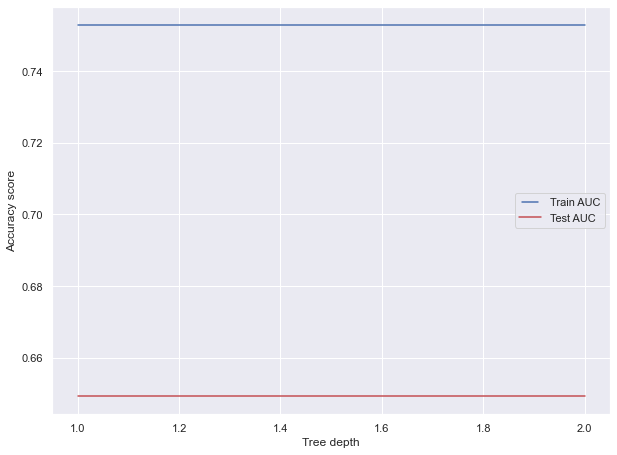

In [169]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 2, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   decisionTree = LogisticRegression(C= 7.742636826811269, 
                                          max_iter= 5000, 
                                          penalty= 'l2')
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

In [170]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

Train F1 score: 0.752808988764045
Test F1 score: 0.6493506493506495


Train score 0.7617328519855595
Test score 0.7
Train Confusion matrix


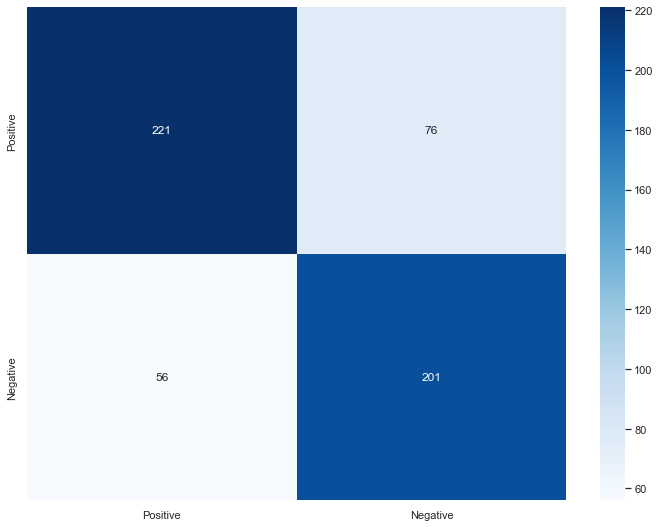

Test Confusion matrix


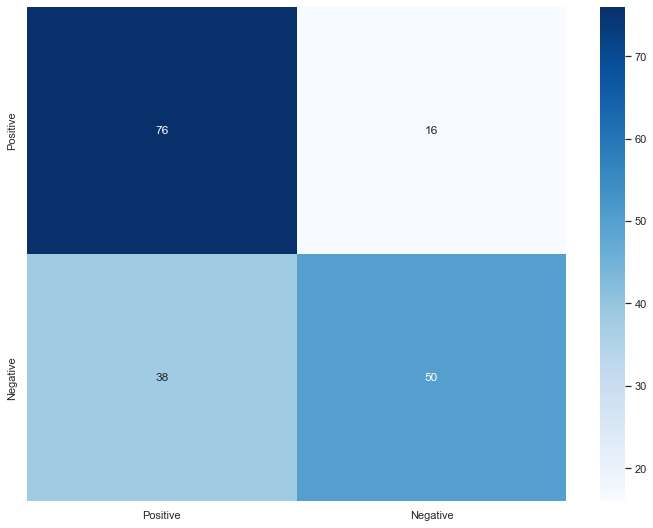

In [171]:
print(f'Train score {accuracy_score(train_pred,y_train)}')
print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

In [172]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       277
           1       0.78      0.73      0.75       277

    accuracy                           0.76       554
   macro avg       0.76      0.76      0.76       554
weighted avg       0.76      0.76      0.76       554



In [173]:
print(y_train)

0      0
1      0
2      1
3      0
4      0
      ..
549    1
550    1
551    1
552    1
553    1
Name: Sepsis, Length: 554, dtype: int32


In [174]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

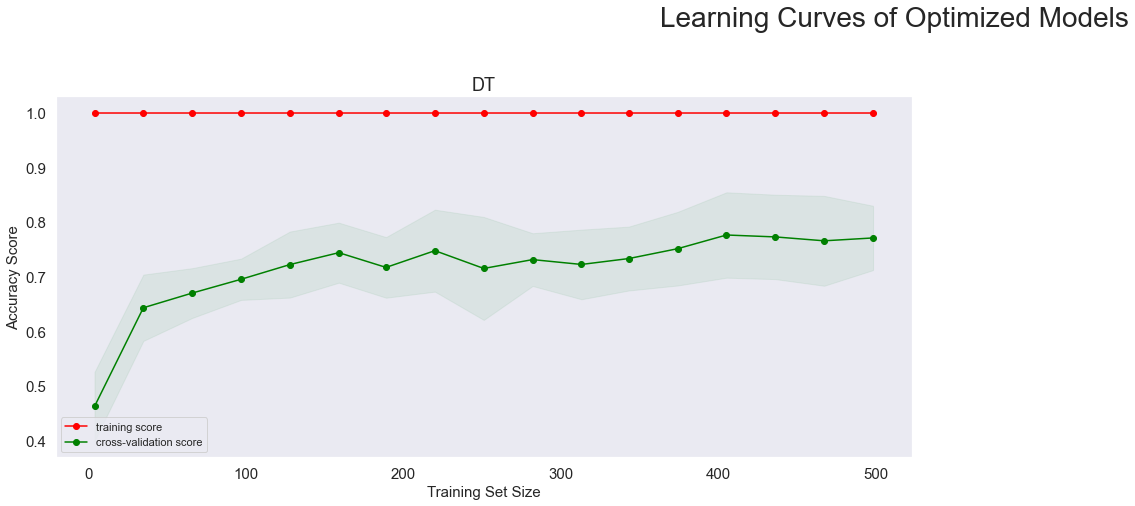

In [175]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [dt]
lcLabels = ["DT"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# Raindom Forest
***

In [176]:
"""#6.Decision Tree Classifier"""
rf = RandomForestClassifier(random_state = seed)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7222222222222222

## Hypertunning 

In [178]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""



'For DT, the following hyperparameters are usually tunned.'

In [179]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       114
           1       0.59      0.79      0.68        66

    accuracy                           0.72       180
   macro avg       0.72      0.74      0.72       180
weighted avg       0.75      0.72      0.73       180



# Gridsearch

In [181]:

import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

In [182]:
## Getting the best of everything. 
print (model.best_score_)
print (model.best_params_)
print(model.best_estimator_)

0.8213950578667502
{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 1200, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', max_depth=1200, max_features=None,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1200)


The Training f1 Accuracy for max_depth 1.0 is: 0.93048128342246
The Test f1 Accuracy for max_depth 1.0 is: 0.6666666666666666
The Training f1 Accuracy for max_depth 2.0 is: 0.93048128342246
The Test f1 Accuracy for max_depth 2.0 is: 0.6666666666666666


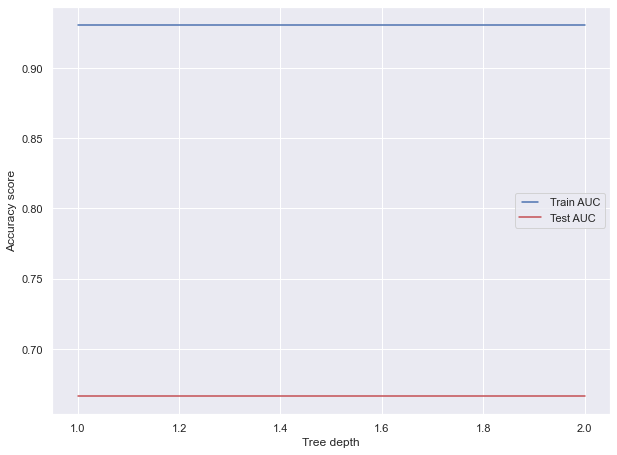

In [183]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 2, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators= 1200,
                                         min_samples_split= 10,
                                         min_samples_leaf= 2,
                                         max_features= 'auto',
                                         max_depth= 10,
                                         criterion= 'gini')

   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = rf.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

In [184]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

Train F1 score: 0.93048128342246
Test F1 score: 0.6666666666666666


Train score 0.9296028880866426
Test score 0.7055555555555556
Train Confusion matrix


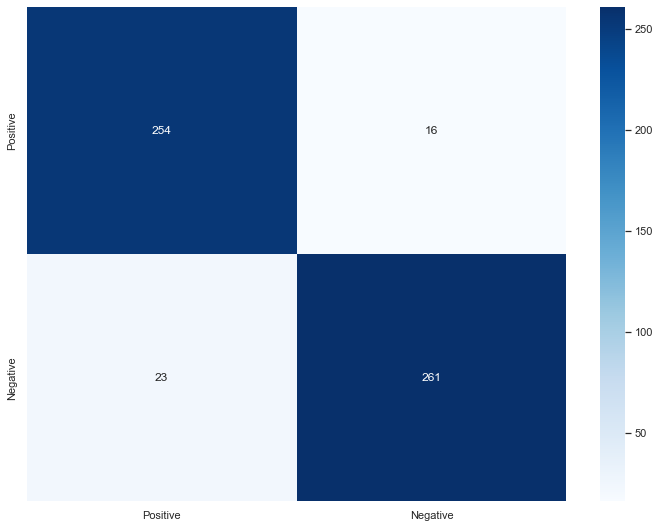

Test Confusion matrix


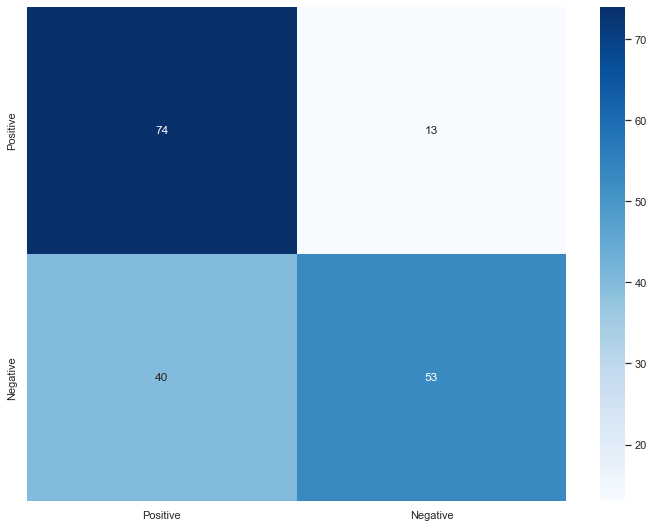

In [185]:
print(f'Train score {accuracy_score(train_pred,y_train)}')
print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

In [186]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       277
           1       0.92      0.94      0.93       277

    accuracy                           0.93       554
   macro avg       0.93      0.93      0.93       554
weighted avg       0.93      0.93      0.93       554



In [187]:
print(y_train)

0      0
1      0
2      1
3      0
4      0
      ..
549    1
550    1
551    1
552    1
553    1
Name: Sepsis, Length: 554, dtype: int32


In [188]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

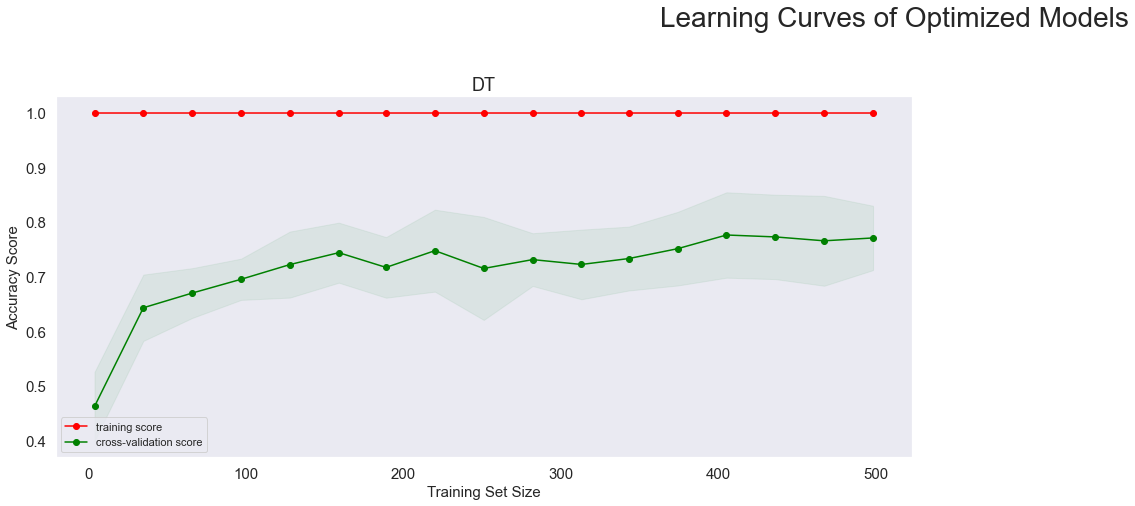

In [189]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [dt]
lcLabels = ["DT"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])